In [ ]:
import keras
import tensorflow as tf
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import models
from keras.preprocessing import image
import numpy as np
from keras.utils.vis_utils import plot_model
import os
import shutil


In [19]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
plot_model(conv_base, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [ ]:
real_dataset_dir = "download"
real_dataset_dir_rust = "download/rust"
real_dataset_dir_norust = "download/norust"

base_dir = "rust_norust_dir"

train_dir = os.path.join(base_dir,"train")

val_dir = os.path.join(base_dir,"validation")

test_dir = os.path.join(base_dir,"test")

train_rust = os.path.join(train_dir,"rust")
train_norust = os.path.join(train_dir,"norust")

validation_rust = os.path.join(val_dir,"rust")
validation_norust = os.path.join(val_dir,"norust")

test_rust = os.path.join(test_dir,"rust")
test_norust = os.path.join(test_dir,"norust")





In [29]:
images = ['rust.{}.jpg'.format(i) for i in range(70)]
for image in images:
    source = os.path.join(real_dataset_dir_rust, image)
    destination = os.path.join(train_rust, image)
    shutil.copyfile(source, destination)
    
images = ['rust.{}.jpg'.format(i) for i in range(70,76)]
for image in images:
    source = os.path.join(real_dataset_dir_rust,image)
    destination = os.path.join(validation_rust,image)
    shutil.copyfile(source,destination)
    
images = ['rust.{}.jpg'.format(i) for i in range(76,82)]
for image in images:
    source = os.path.join(real_dataset_dir_rust,image)
    destination = os.path.join(test_rust,image)
    shutil.copyfile(source,destination)
    
images = ['norust.{}.jpg'.format(i) for i in range(60)]
for image in images:
    source = os.path.join(real_dataset_dir_norust,image)
    destination = os.path.join(train_norust,image)
    shutil.copyfile(source,destination)
    
images = ['norust.{}.jpg'.format(i) for i in range(60,66)]
for image in images:
    source = os.path.join(real_dataset_dir_norust,image)
    dest = os.path.join(validation_norust,image)
    shutil.copyfile(source,destination)
    
images = ['norust.{}.jpg'.format(i)for i in range(66,72)]
for image in images:
    source = os.path.join(real_dataset_dir_norust,image)
    destination = os.path.join(test_norust,image)
    shutil.copyfile(source,destination)
    

In [30]:
print('total training rust images:', len(os.listdir(train_rust)))
print('total training norust images:', len(os.listdir(train_norust)))
print('total validation rust images:', len(os.listdir(validation_rust)))
print('total validation norust images:', len(os.listdir(validation_norust)))
print('total test rust images:', len(os.listdir(test_rust)))
print('total test norust images:', len(os.listdir(test_norust)))

total training rust images: 70
total training norust images: 60
total validation rust images: 6
total validation norust images: 0
total test rust images: 6
total test norust images: 6


In [31]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [33]:
conv_base.trainable = False 

In [36]:
base_dir = 'rust_norust_dir'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

 #       save_to_dir='/home/anirban/rustnorust_b/images')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 130 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [37]:
from time import time
from keras.callbacks import TensorBoard
#callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.00001,patience=5,mode='min')]
tensorboard = keras.callbacks.TensorBoard(log_dir='/output/{}'.format(time()))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

history = model.fit_generator(train_generator,steps_per_epoch=10,epochs=15,validation_data=validation_generator,validation_steps=20,verbose=2,callbacks=[tensorboard])

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
 - 226s - loss: 0.5390 - acc: 0.7750 - val_loss: 0.5123 - val_acc: 0.6667
Epoch 2/15
 - 229s - loss: 0.4629 - acc: 0.8684 - val_loss: 0.6213 - val_acc: 0.6667
Epoch 3/15
 - 225s - loss: 0.4333 - acc: 0.8000 - val_loss: 0.4573 - val_acc: 0.6667
Epoch 4/15
 - 211s - loss: 0.3446 - acc: 0.9250 - val_loss: 0.5991 - val_acc: 0.6667
Epoch 5/15
 - 215s - loss: 0.3959 - acc: 0.9211 - val_loss: 0.3848 - val_acc: 0.6667
Epoch 6/15
 - 197s - loss: 0.3808 - acc: 0.8250 - val_loss: 0.5132 - val_acc: 0.6667
Epoch 7/15
 - 190s - loss: 0.3152 - acc: 0.9000 - val_loss: 0.4216 - val_acc: 0.6667
Epoch 8/15
 - 233s - loss: 0.3479 - acc: 0.9250 - val_loss: 0.3987 - val_acc: 0.6667
Epoch 9/15
 - 230s - loss: 0.2957 - acc: 0.9211 - val_loss: 0.3646 - val_acc: 0.6667
Epoch 10/15
 - 225s - loss: 0.1875 - acc: 1.0000 - val_loss: 0.3494 - val_acc: 0.6667
Epoch 11/15
 - 226s - loss: 0.3371 - acc: 0.8421 - val_loss: 0.3311 - val_acc: 0.6667
Epoch 12/15
 - 

In [38]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("rust_detector.h5")
print("Saved model to disk") 

Saved model to disk


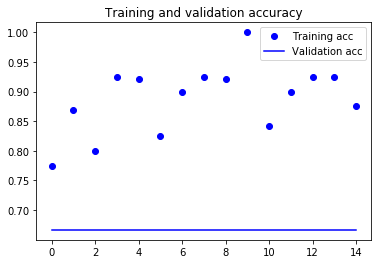

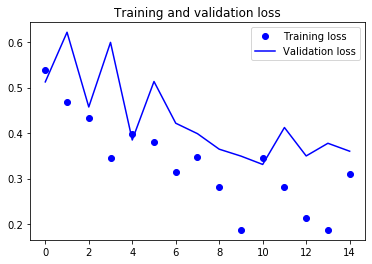

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

This is a Rust image


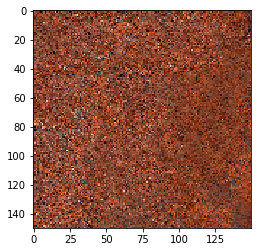

In [46]:
%matplotlib inline
img_path = 'rust_norust_dir/test/rust/rust.80.jpg'

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

plt.imshow(img)
# Convert it to a Numpy array with shape (150, 150, 3)
test_x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
test_x = test_x.reshape((1,) + test_x.shape)
test_x = test_x.astype('float32') / 255
rust_prob = model.predict(test_x)

if (rust_prob > 0.5):
    print("This is a Rust image")
else:
    print("This is a no Rust image")

This is a no Rust image


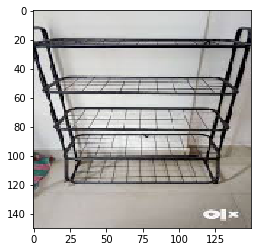

In [45]:
img_path = 'rust.jfif'
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
# Convert it to a Numpy array with shape (150, 150, 3)
test_x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
test_x = test_x.reshape((1,) + test_x.shape)
test_x = test_x.astype('float32') / 255
rust_prob = model.predict(test_x)

if (rust_prob > 0.5):
    print("This is a Rust image")
else:
    print("This is a no Rust image")